# 610_RQ2_Analysis_2
## Purpose 
Initial analysis of our Reseach Question 2  
## Datasets 
* _Input_: RQ2.csv
* _Output_: N/A

# Homegrown vs Foreign
### Do homegrown players generally perform the best in their respective leagues or are they inferior to their foreign counterparts? 
### Are the results reflected in FIFA's ratings?
## Player Stat Analysis:

In [1]:
import os.path
import pandas as pd
import matplotlib
import matplotlib.pylab as plt
import matplotlib as mpl
%matplotlib inline
import matplotlib.ticker as mtick

#### Reading in our RQ2 dataset.

In [2]:
RQ2 = pd.read_csv(('../../data/analysis/RQ2.csv'))
RQ2 = RQ2.drop('Unnamed: 0', 1)
RQ2 = RQ2.iloc[1:]

#### Quick glance at the dataframe.

In [3]:
RQ2.head(5)

,Players,Position,league,age,nationality,overall,photo,skill_moves,pac,def,...,eur_wage,Homegrown,Abroad,Starts/Apps,Subbed Off/Apps,Overall Apps,Average Form,Goals/Apps,Assists/Apps,Clean Sheets/Apps
1,Aaron Cresswell,Defender,English Premier League,27.0,England,76.0,https://cdn.sofifa.org/18/players/189615.png,2.0,76.0,73.0,...,83000.0,True,False,0.980198,0.039604,101.0,2.821782,0.039604,0.099010,0.247525
2,Aaron Hughes,Defender,Scottish Premiership,37.0,Northern Ireland,71.0,https://cdn.sofifa.org/18/players/17725.png,2.0,23.0,72.0,...,5000.0,False,False,0.918919,0.000000,37.0,1.216216,0.000000,0.000000,0.162162
3,Aaron Hunt,Midfielder,German Bundesliga,30.0,Germany,76.0,https://cdn.sofifa.org/18/players/158138.png,3.0,68.0,39.0,...,38000.0,True,False,0.788136,0.279661,118.0,3.050847,0.211864,0.118644,0.000000
4,Aaron Lennon,Midfielder,English Premier League,30.0,England,77.0,https://cdn.sofifa.org/18/players/152747.png,3.0,83.0,38.0,...,97000.0,True,False,0.808333,0.391667,120.0,2.633333,0.100000,0.125000,0.000000
5,Aaron Leya Iseka,Forward,Belgian First Division A,19.0,Belgium,68.0,https://cdn.sofifa.org/18/players/223929.png,3.0,79.0,21.0,...,9000.0,False,False,0.375000,0.375000,8.0,2.125000,0.000000,0.250000,0.000000


# Homegrown/Foreign

### Creating dataframes
* **Homegrown** - contains all Homegrown players.<br> <br>
* **Foreign** - contains all Foreign players.

In [4]:
Homegrown = RQ2.loc[RQ2.Homegrown==True]
Foreign = RQ2.loc[RQ2.Homegrown==False]

### Player Value of Homegrown/Foreign
* Finding the value of Homegrown and Foreign players and displaying them in a dataframe.

#### Findings
* Homegrown players on average are valued **€1 million more** than Foreign players.

,Homegrown,Foreign
0,7.66376e+06,6.4461e+06


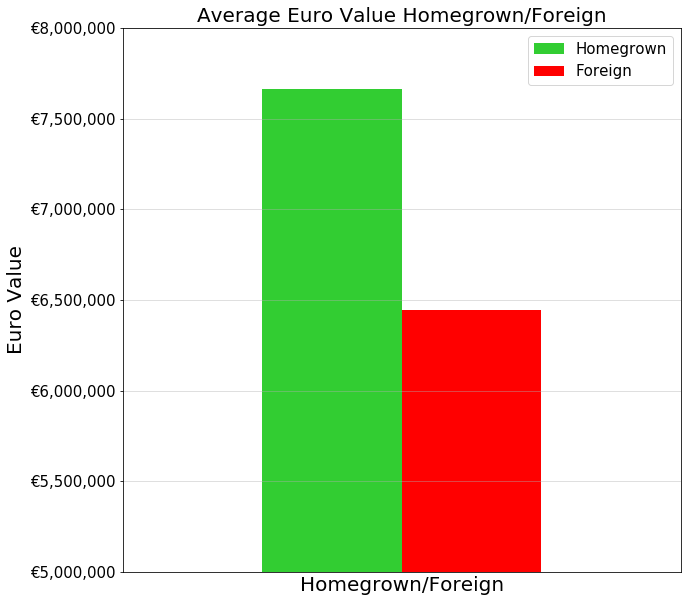

In [5]:
HomegrownValue = Homegrown['eur_value'].mean()
ForeignValue = Foreign['eur_value'].mean()

HFValue = pd.DataFrame(columns = ["Homegrown", "Foreign"])
HFValue.set_value(0,'Homegrown',HomegrownValue)
HFValue.set_value(0,'Foreign',ForeignValue)

mpl.rcParams['font.size'] = 15
axis_size=20
color = ['limegreen','r']
fig = plt.figure(figsize=(10,10))
ax0 = plt.subplot()
ax0.set_ylim([5000000,8000000])
ax0.set_ylabel('Euro Value',size=axis_size)
ax0.set_xlabel('Homegrown/Foreign',size=axis_size)
ax0.set_title('Average Euro Value Homegrown/Foreign',size=20)
HFValue.plot(ax=ax0,kind='bar',color=color,grid=True)
ax0.grid(alpha=0.5)
fmt = '€{x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax0.yaxis.set_major_formatter(tick) 
plt.xticks([])

HFValue

### Player Wage of Homegrown/Foreign
* Finding the wage of Homegrown and Foreign players and displaying them in a dataframe.

#### Findings
* Homegrown players on average are payed **€6 thousand more** a week than Foreign players.

,Homegrown,Foreign
0,36964.7,30025.9


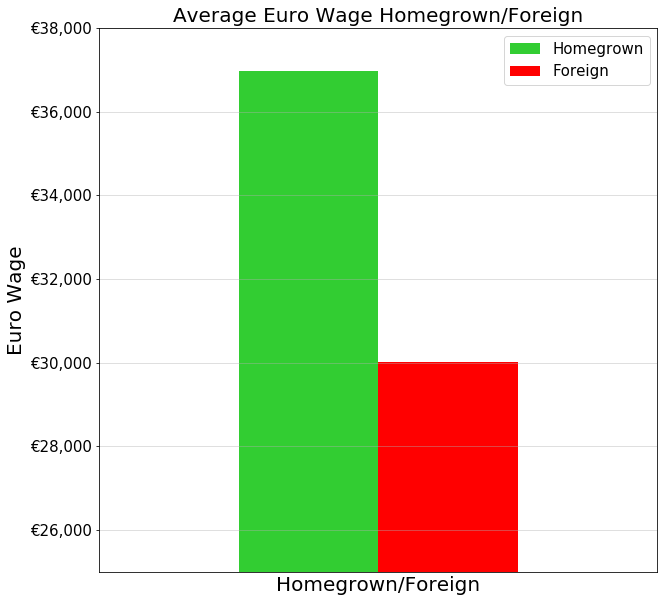

In [6]:
HomegrownWage = Homegrown['eur_wage'].mean()
ForeignWage = Foreign['eur_wage'].mean()

HFWage = pd.DataFrame(columns = ["Homegrown", "Foreign"])
HFWage.set_value(0,'Homegrown',HomegrownWage)
HFWage.set_value(0,'Foreign',ForeignWage)

mpl.rcParams['font.size'] = 15
axis_size=20
color = ['limegreen','r']
fig = plt.figure(figsize=(10,10))
ax0 = plt.subplot()
ax0.set_ylim([25000,38000])
ax0.set_ylabel('Euro Wage',size=axis_size)
ax0.set_xlabel('Homegrown/Foreign',size=axis_size)
ax0.set_title('Average Euro Wage Homegrown/Foreign',size=20)
HFWage.plot(ax=ax0,kind='bar',color=color,grid=True)
ax0.grid(alpha=0.5)
fmt = '€{x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax0.yaxis.set_major_formatter(tick) 
plt.xticks([])

HFWage

### Dividing players into categorys
* Splitting players into two cateogorys:<br> **DEF** - containing Goalkeepers and Defenders.<br> **ATT** - containing Midfielder and Forwards.
* Different dataframes exist for Homegrown and Foreign players.

In [7]:
Homegrown_GK = (Homegrown[Homegrown.Position == 'Goalkeeper'])
Homegrown_DF = (Homegrown[Homegrown.Position == 'Defender'])
Homegrown_MD = (Homegrown[Homegrown.Position == 'Midfielder'])
Homegrown_FW = (Homegrown[Homegrown.Position == 'Forward'])

Foreign_GK = (Foreign[Foreign.Position == 'Goalkeeper'])
Foreign_DF = (Foreign[Foreign.Position == 'Defender'])
Foreign_MD = (Foreign[Foreign.Position == 'Midfielder'])
Foreign_FW = (Foreign[Foreign.Position == 'Forward'])

Homegrown_DEF = pd.concat([Homegrown_GK,Homegrown_DF])
Homegrown_ATT = pd.concat([Homegrown_MD,Homegrown_FW])

Foreign_DEF = pd.concat([Foreign_GK,Foreign_DF])
Foreign_ATT = pd.concat([Foreign_MD,Foreign_FW])

### Average Player Skill Homegrown/Foreign (ATT)
* Finding average skill rating of Homegrown and Foreign players and displaying them in a dataframe.

#### Findings
* Foreign players on average have a **.2** better skill rating than Homegrown players.

,Homegrown,Foreign
0,2.76852,2.88577


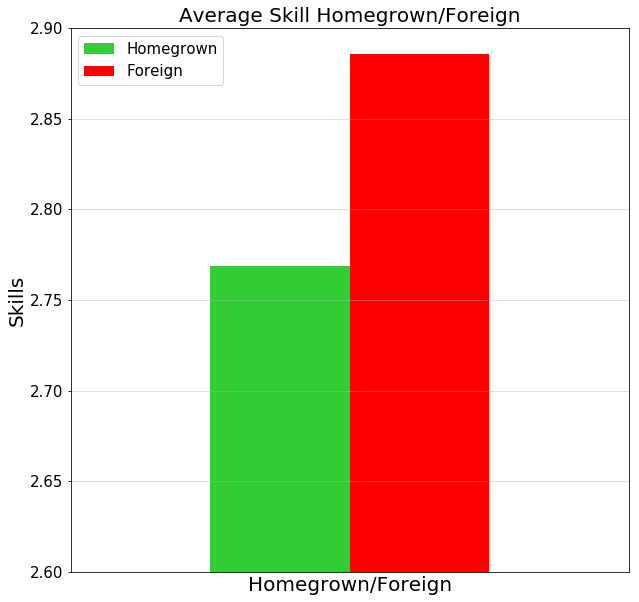

In [8]:
HomegrownSkills = Homegrown_ATT['skill_moves'].mean()
ForeignSkills = Foreign_ATT['skill_moves'].mean()

HFSkills = pd.DataFrame(columns = ["Homegrown", "Foreign"])
HFSkills.set_value(0,'Homegrown',HomegrownSkills)
HFSkills.set_value(0,'Foreign',ForeignSkills)

mpl.rcParams['font.size'] = 15
axis_size=20
color = ['limegreen','r']
fig = plt.figure(figsize=(10,10))
ax0 = plt.subplot()
ax0.set_ylim([2.6,2.9])
ax0.set_ylabel('Skills',size=axis_size)
ax0.set_xlabel('Homegrown/Foreign',size=axis_size)
ax0.set_title('Average Skill Homegrown/Foreign',size=20)
HFSkills.plot(ax=ax0,kind='bar',color=color,grid=True)
ax0.grid(alpha=0.5)
plt.xticks([])

HFSkills

### Average Player Pace(Speed) Homegrown/Foreign (ATT)
* Finding average pace rating of Homegrown and Foreign players and displaying them in a dataframe.

#### Findings
* Foreign players on average are **faster** than Homegrown players.

,Homegrown,Foreign
0,70.7056,71.2484


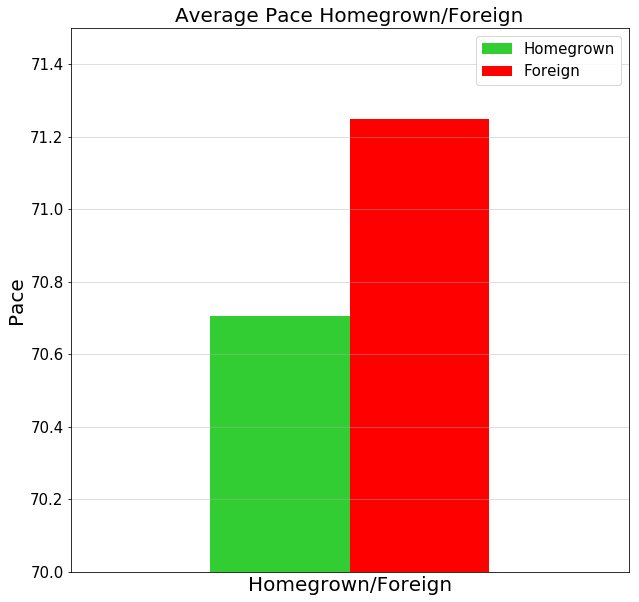

In [9]:
HomegrownPace = Homegrown_ATT['pac'].mean()
ForeignPace = Foreign_ATT['pac'].mean()

HFPace = pd.DataFrame(columns = ["Homegrown", "Foreign"])
HFPace.set_value(0,'Homegrown',HomegrownPace)
HFPace.set_value(0,'Foreign',ForeignPace)

mpl.rcParams['font.size'] = 15
axis_size=20
color = ['limegreen','r']
fig = plt.figure(figsize=(10,10))
ax0 = plt.subplot()
ax0.set_ylim([70,71.5])
ax0.set_ylabel('Pace',size=axis_size)
ax0.set_xlabel('Homegrown/Foreign',size=axis_size)
ax0.set_title('Average Pace Homegrown/Foreign',size=20)
HFPace.plot(ax=ax0,kind='bar',color=color,grid=True)
ax0.grid(alpha=0.5)
plt.xticks([])

HFPace

### Average Player Passing Homegrown/Foreign (ATT)
* Finding average passing rating of Homegrown and Foreign players and displaying them in a dataframe.

#### Findings
* Homegrown players on average are **2 ratings higher** than Foreign players.

,Homegrown,Foreign
0,67.937,65.7903


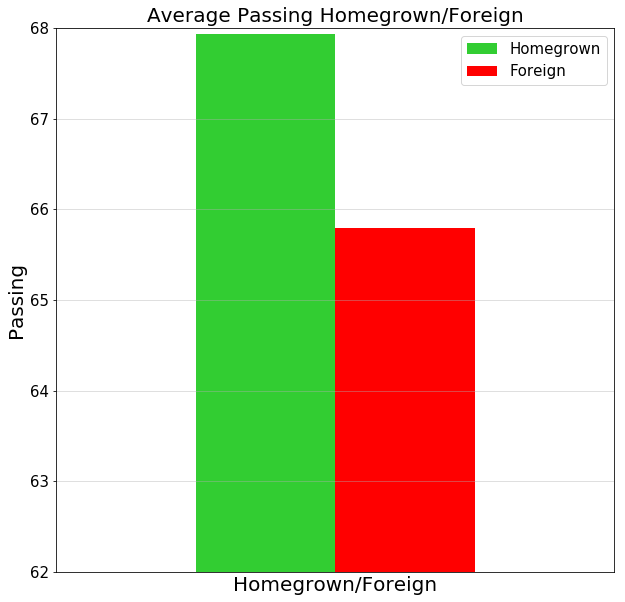

In [10]:
HomegrownPass = Homegrown_ATT['pas'].mean()
ForeignPass = Foreign_ATT['pas'].mean()

HFPass = pd.DataFrame(columns = ["Homegrown", "Foreign"])
HFPass.set_value(0,'Homegrown',HomegrownPass)
HFPass.set_value(0,'Foreign',ForeignPass)

mpl.rcParams['font.size'] = 15
axis_size=20
color = ['limegreen','r']
fig = plt.figure(figsize=(10,10))
ax0 = plt.subplot()
ax0.set_ylim([62,68])
ax0.set_ylabel('Passing',size=axis_size)
ax0.set_xlabel('Homegrown/Foreign',size=axis_size)
ax0.set_title('Average Passing Homegrown/Foreign',size=20)
HFPass.plot(ax=ax0,kind='bar',color=color,grid=True)
ax0.grid(alpha=0.5)
plt.xticks([])

HFPass

### Average Player Dribbling Homegrown/Foreign (ATT)
* Finding average dribbling rating of Homegrown and Foreign players and displaying them in a dataframe.

#### Findings
* Homegrown players on average are **2 ratings higher** than Foreign players.

,Homegrown,Foreign
0,72.8278,71.525


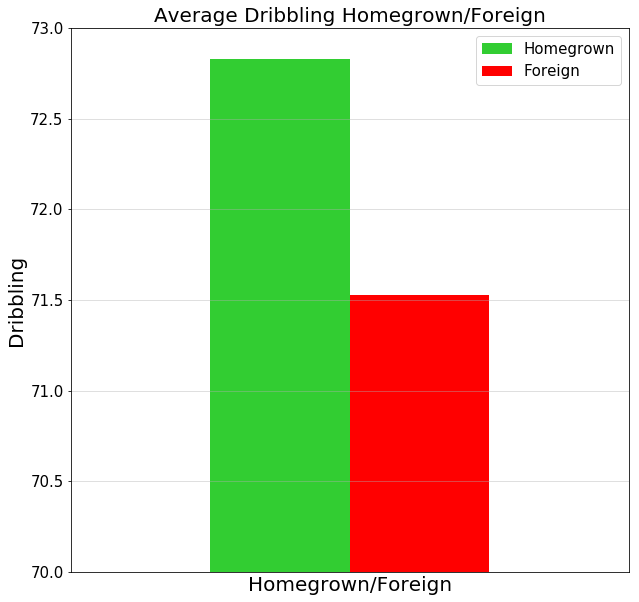

In [11]:
HomegrownDribbling = Homegrown_ATT['dri'].mean()
ForeignDribbling = Foreign_ATT['dri'].mean()

HFDribbling = pd.DataFrame(columns = ["Homegrown", "Foreign"])
HFDribbling.set_value(0,'Homegrown',HomegrownDribbling)
HFDribbling.set_value(0,'Foreign',ForeignDribbling)

mpl.rcParams['font.size'] = 15
axis_size=20
color = ['limegreen','r']
fig = plt.figure(figsize=(10,10))
ax0 = plt.subplot()
ax0.set_ylim([70,73])
ax0.set_ylabel('Dribbling',size=axis_size)
ax0.set_xlabel('Homegrown/Foreign',size=axis_size)
ax0.set_title('Average Dribbling Homegrown/Foreign',size=20)
HFDribbling.plot(ax=ax0,kind='bar',color=color,grid=True)
ax0.grid(alpha=0.5)
plt.xticks([])

HFDribbling

### Average Player Defending Homegrown/Foreign (DEF)
* Finding average defending rating of Homegrown and Foreign players and displaying them in a dataframe.

#### Findings
* Foreign players on average are **2 ratings higher** than Homegrown players.

,Homegrown,Foreign
0,64.2842,66.1647


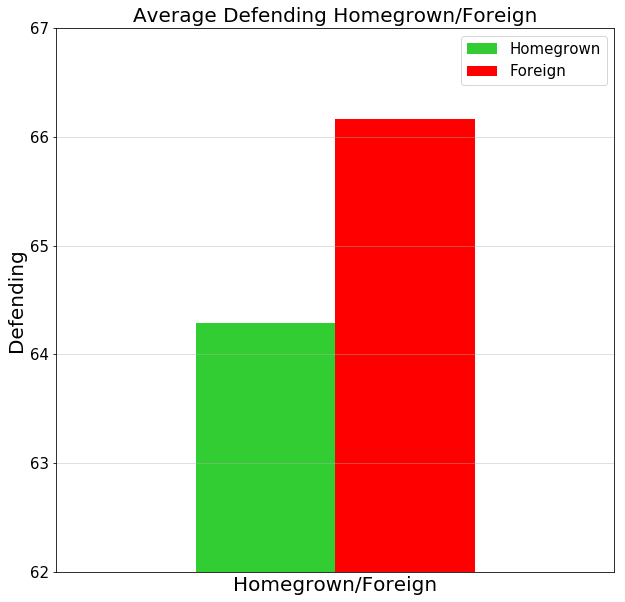

In [12]:
HomegrownDef = Homegrown_DEF['def'].mean()
ForeignDef = Foreign_DEF['def'].mean()


HFDef = pd.DataFrame(columns = ["Homegrown", "Foreign"])
HFDef.set_value(0,'Homegrown',HomegrownDef)
HFDef.set_value(0,'Foreign',ForeignDef)

mpl.rcParams['font.size'] = 15
axis_size=20
color = ['limegreen','r']
fig = plt.figure(figsize=(10,10))
ax0 = plt.subplot()
ax0.set_ylim([62,67])
ax0.set_ylabel('Defending',size=axis_size)
ax0.set_xlabel('Homegrown/Foreign',size=axis_size)
ax0.set_title('Average Defending Homegrown/Foreign',size=20)
HFDef.plot(ax=ax0,kind='bar',color=color,grid=True)
ax0.grid(alpha=0.5)
plt.xticks([])

HFDef

### Average Player Defending Pace Homegrown/Foreign (DEF)
* Finding average defending pace rating of Homegrown and Foreign players and displaying them in a dataframe.

#### Findings
* Homegrown players on average are **3 ratings higher** than Foreign players.

,Homegrown,Foreign
0,69.4372,66.3094


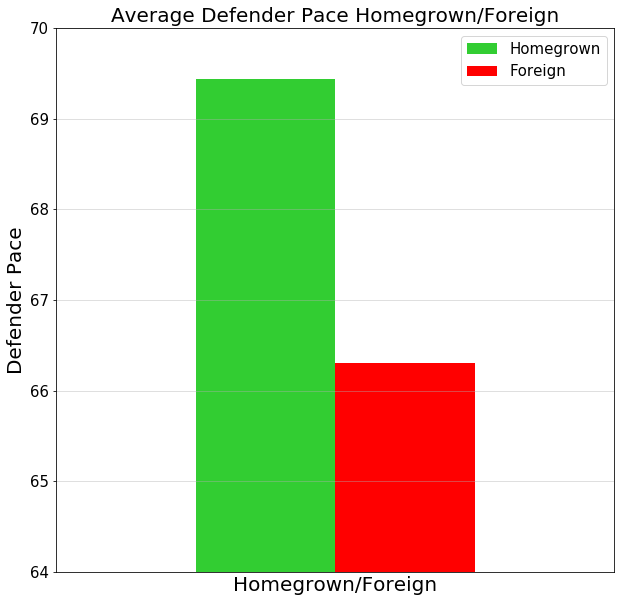

In [13]:
HomegrownDefPace = Homegrown_DEF['pac'].mean()
ForeignDefPace = Foreign_DEF['pac'].mean()

HFDefPace = pd.DataFrame(columns = ["Homegrown", "Foreign"])
HFDefPace.set_value(0,'Homegrown',HomegrownDefPace)
HFDefPace.set_value(0,'Foreign',ForeignDefPace)

mpl.rcParams['font.size'] = 15
axis_size=20
color = ['limegreen','r']
fig = plt.figure(figsize=(10,10))
ax0 = plt.subplot()
ax0.set_ylim([64,70])
ax0.set_ylabel('Defender Pace',size=axis_size)
ax0.set_xlabel('Homegrown/Foreign',size=axis_size)
ax0.set_title('Average Defender Pace Homegrown/Foreign',size=20)
HFDefPace.plot(ax=ax0,kind='bar',color=color,grid=True)
ax0.grid(alpha=0.5)
plt.xticks([])

HFDefPace

# Home/Abroad

### Creating dataframes
* **Home** - contains all Home players.<br> <br>
* **Abroad** - contains all Abroad players.

In [14]:
Abroad = RQ2.loc[RQ2.Abroad==True]
Home = RQ2.loc[RQ2.Abroad==False]

### Player Value of Home/Abroad
* Finding the value of Home and Abroad players and displaying them in a dataframe.

#### Findings
* Abroad players are valued a stagerring **€11 million more** than Home players on average.

,Home,Abroad
0,6.27084e+06,1.72244e+07


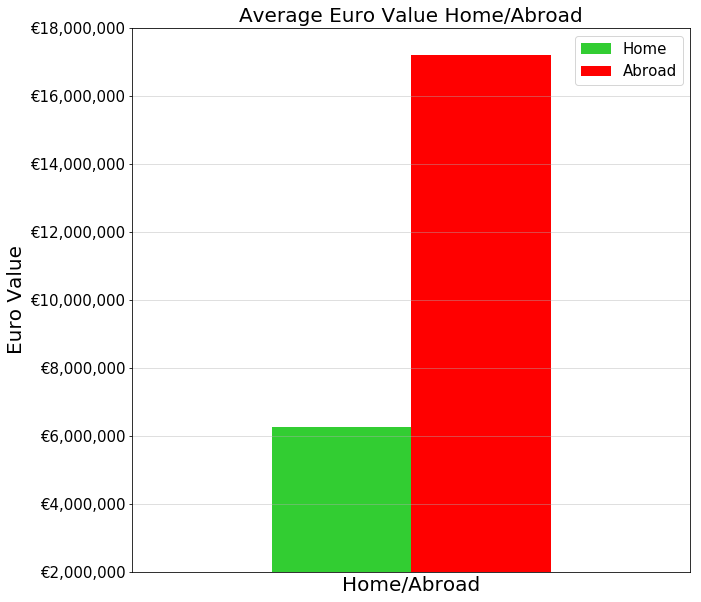

In [15]:
AbroadValue = Abroad['eur_value'].mean()
HomeValue = Home['eur_value'].mean()


AHValue = pd.DataFrame(columns = ["Home", "Abroad"])
AHValue.set_value(0,'Home',HomeValue)
AHValue.set_value(0,'Abroad',AbroadValue)

mpl.rcParams['font.size'] = 15
axis_size=20
color = ['limegreen','r']
fig = plt.figure(figsize=(10,10))
ax0 = plt.subplot()
ax0.set_ylim([2000000,18000000])
ax0.set_ylabel('Euro Value',size=axis_size)
ax0.set_xlabel('Home/Abroad',size=axis_size)
ax0.set_title('Average Euro Value Home/Abroad',size=20)
AHValue.plot(ax=ax0,kind='bar',color=color,grid=True)
ax0.grid(alpha=0.5)
fmt = '€{x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax0.yaxis.set_major_formatter(tick) 
plt.xticks([])

AHValue

### Player Wage of Home/Abroad
* Finding the wage of Home and Abroad players and displaying them in a dataframe.

#### Findings
* Abroad players are payed a monumental **€50 thousand more** than Home players on average.

,Home,Abroad
0,29636.3,78564.1


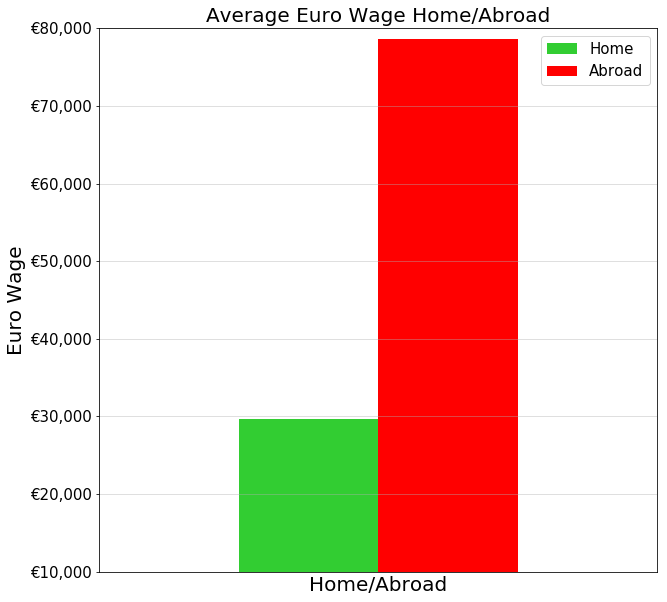

In [16]:
AbroadWage = Abroad['eur_wage'].mean()
HomeWage = Home['eur_wage'].mean()

AHWage = pd.DataFrame(columns = ["Home", "Abroad"])
AHWage.set_value(0,'Home',HomeWage)
AHWage.set_value(0,'Abroad',AbroadWage)

mpl.rcParams['font.size'] = 15
axis_size=20
color = ['limegreen','r']
fig = plt.figure(figsize=(10,10))
ax0 = plt.subplot()
ax0.set_ylim([10000,80000])
ax0.set_ylabel('Euro Wage',size=axis_size)
ax0.set_xlabel('Home/Abroad',size=axis_size)
ax0.set_title('Average Euro Wage Home/Abroad',size=20)
AHWage.plot(ax=ax0,kind='bar',color=color,grid=True)
ax0.grid(alpha=0.5)
fmt = '€{x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax0.yaxis.set_major_formatter(tick) 
plt.xticks([])

AHWage

### Dividing players into categorys
* Splitting players into two cateogorys:<br> **DEF** - containing Goalkeepers and Defenders.<br> **ATT** - containing Midfielder and Forwards.
* Different dataframes exist for Home and Abroad players.

In [17]:
Home_GK = (Home[Home.Position == 'Goalkeeper'])
Home_DF = (Home[Home.Position == 'Defender'])
Home_MD = (Home[Home.Position == 'Midfielder'])
Home_FW = (Home[Home.Position == 'Forward'])

Abroad_GK = (Abroad[Abroad.Position == 'Goalkeeper'])
Abroad_DF = (Abroad[Abroad.Position == 'Defender'])
Abroad_MD = (Abroad[Abroad.Position == 'Midfielder'])
Abroad_FW = (Abroad[Abroad.Position == 'Forward'])

Home_DEF = pd.concat([Home_GK,Home_DF])
Home_ATT = pd.concat([Home_MD,Home_FW])

Abroad_DEF = pd.concat([Abroad_GK,Abroad_DF])
Abroad_ATT = pd.concat([Abroad_MD,Abroad_FW])

### Average Player Skill Homeg/Abroad (ATT)
* Finding average skill rating of Home and Abroad players and displaying them in a dataframe.

#### Findings
* Abroad players on average have a **.3** better skill rating than Home players.

,Home,Abroad
0,2.84717,3.05319


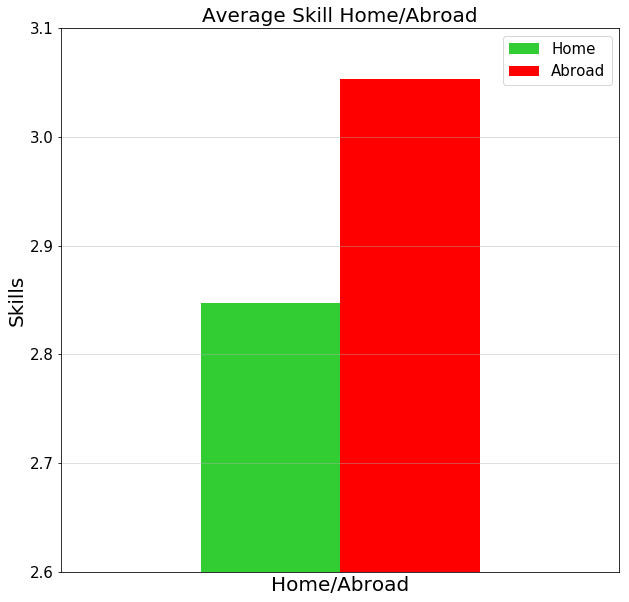

In [18]:
HomeSkills = Home_ATT['skill_moves'].mean()
AbroadSkills = Abroad_ATT['skill_moves'].mean()

AHSkills = pd.DataFrame(columns = ["Home", "Abroad"])
AHSkills.set_value(0,'Home',HomeSkills)
AHSkills.set_value(0,'Abroad',AbroadSkills)

mpl.rcParams['font.size'] = 15
axis_size=20
color = ['limegreen','r']
fig = plt.figure(figsize=(10,10))
ax0 = plt.subplot()
ax0.set_ylim([2.6,3.1])
ax0.set_ylabel('Skills',size=axis_size)
ax0.set_xlabel('Home/Abroad',size=axis_size)
ax0.set_title('Average Skill Home/Abroad',size=20)
AHSkills.plot(ax=ax0,kind='bar',color=color,grid=True)
ax0.grid(alpha=0.5)
plt.xticks([])

AHSkills

### Average Player Pace(Speed) Home/Abroad (ATT)
* Finding average pace rating of Home and Abroad players and displaying them in a dataframe.

#### Findings
* Abroad players on average are **faster** than Home players.

,Home,Abroad
0,70.979,74


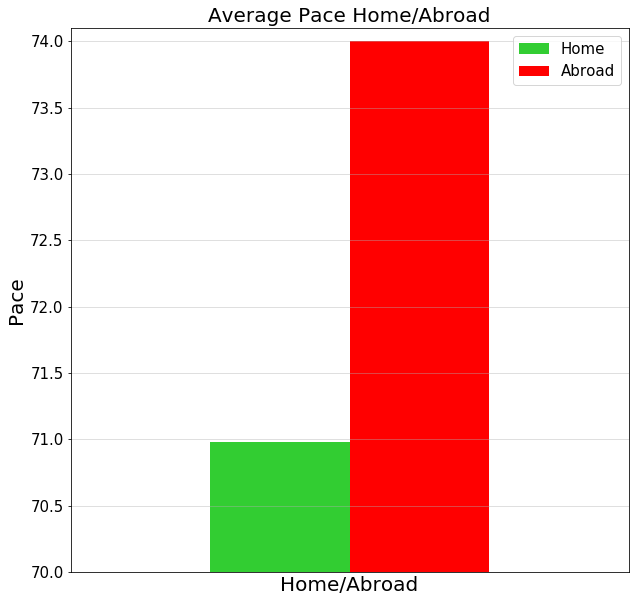

In [19]:
HomePace = Home_ATT['pac'].mean()
AbroadPace = Abroad_ATT['pac'].mean()

AHPace = pd.DataFrame(columns = ["Home", "Abroad"])
AHPace.set_value(0,'Home',HomePace)
AHPace.set_value(0,'Abroad',AbroadPace)

mpl.rcParams['font.size'] = 15
axis_size=20
color = ['limegreen','r']
fig = plt.figure(figsize=(10,10))
ax0 = plt.subplot()
ax0.set_ylim([70,74.1])
ax0.set_ylabel('Pace',size=axis_size)
ax0.set_xlabel('Home/Abroad',size=axis_size)
ax0.set_title('Average Pace Home/Abroad',size=20)
AHPace.plot(ax=ax0,kind='bar',color=color,grid=True)
ax0.grid(alpha=0.5)
plt.xticks([])

AHPace

### Average Player Passing Home/Abroad (ATT)
* Finding average passing rating of Home and Abroad players and displaying them in a dataframe.

#### Findings
* Abroad players on average are **6 ratings higher** than Home players.

,Home,Abroad
0,66.0771,71.8723


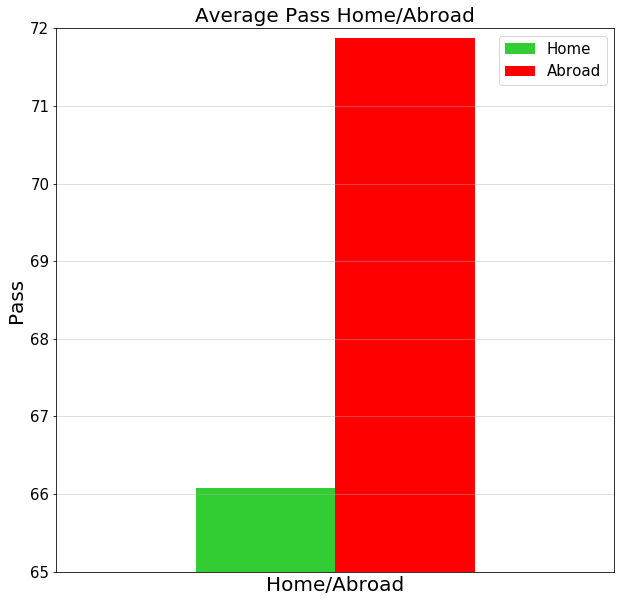

In [20]:
HomePass = Home_ATT['pas'].mean()
AbroadPass = Abroad_ATT['pas'].mean()

AHPass = pd.DataFrame(columns = ["Home", "Abroad"])
AHPass.set_value(0,'Home',HomePass)
AHPass.set_value(0,'Abroad',AbroadPass)

mpl.rcParams['font.size'] = 15
axis_size=20
color = ['limegreen','r']
fig = plt.figure(figsize=(10,10))
ax0 = plt.subplot()
ax0.set_ylim([65,72])
ax0.set_ylabel('Pass',size=axis_size)
ax0.set_xlabel('Home/Abroad',size=axis_size)
ax0.set_title('Average Pass Home/Abroad',size=20)
AHPass.plot(ax=ax0,kind='bar',color=color,grid=True)
ax0.grid(alpha=0.5)
plt.xticks([])

AHPass

### Average Player Defending Home/Abroad (DEF)
* Finding average defending rating of Home and Abroad players and displaying them in a dataframe.

#### Findings
* Abroad players on average are **6 ratings higher** than Home players.

,Home,Abroad
0,71.5972,77.4362


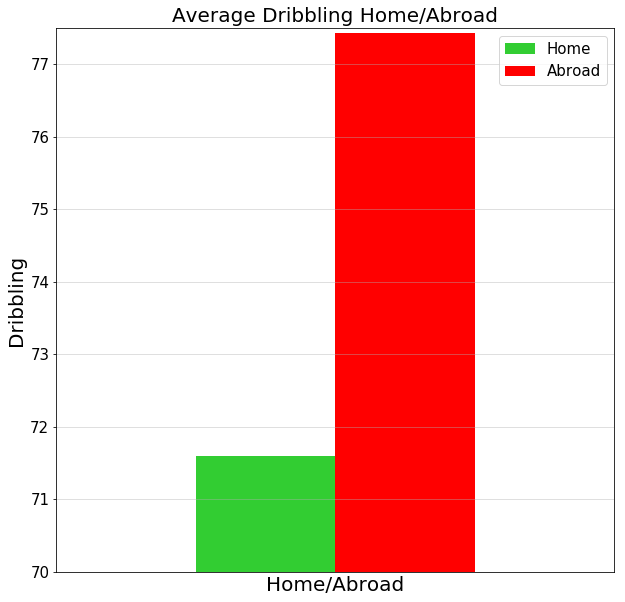

In [21]:
HomeDri = Home_ATT['dri'].mean()
AbroadDri = Abroad_ATT['dri'].mean()

AHDri = pd.DataFrame(columns = ["Home", "Abroad"])
AHDri.set_value(0,'Home',HomeDri)
AHDri.set_value(0,'Abroad',AbroadDri)

mpl.rcParams['font.size'] = 15
axis_size=20
color = ['limegreen','r']
fig = plt.figure(figsize=(10,10))
ax0 = plt.subplot()
ax0.set_ylim([70,77.5])
ax0.set_ylabel('Dribbling',size=axis_size)
ax0.set_xlabel('Home/Abroad',size=axis_size)
ax0.set_title('Average Dribbling Home/Abroad',size=20)
AHDri.plot(ax=ax0,kind='bar',color=color,grid=True)
ax0.grid(alpha=0.5)
plt.xticks([])

AHDri

,Home,Abroad
0,65.247,73.5806


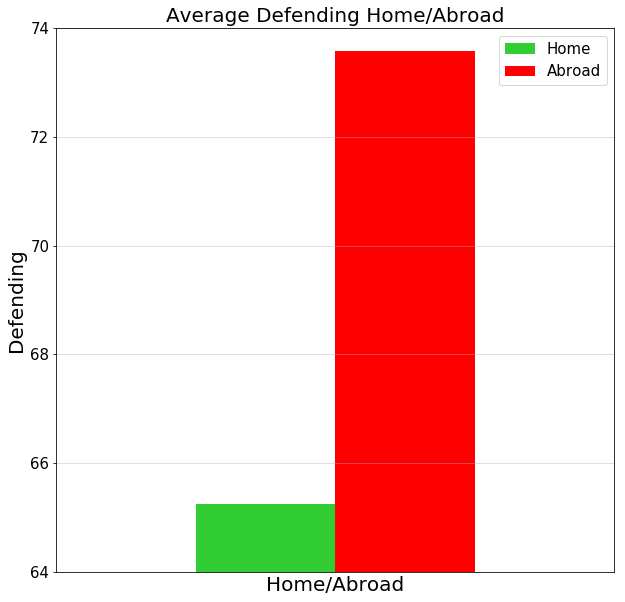

In [22]:
HomeDef = Home_DEF['def'].mean()
AbroadDef = Abroad_DEF['def'].mean()

AHDef = pd.DataFrame(columns = ["Home", "Abroad"])
AHDef.set_value(0,'Home',HomeDef)
AHDef.set_value(0,'Abroad',AbroadDef)

mpl.rcParams['font.size'] = 15
axis_size=20
color = ['limegreen','r']
fig = plt.figure(figsize=(10,10))
ax0 = plt.subplot()
ax0.set_ylim([64,74])
ax0.set_ylabel('Defending',size=axis_size)
ax0.set_xlabel('Home/Abroad',size=axis_size)
ax0.set_title('Average Defending Home/Abroad',size=20)
AHDef.plot(ax=ax0,kind='bar',color=color,grid=True)
ax0.grid(alpha=0.5)
plt.xticks([])

AHDef

### Average Player Defending Pace Home/Abroad (DEF)
* Finding average defending pace rating of Home and Abroad players and displaying them in a dataframe.

#### Findings
* Abroad players on average are **2 ratings higher** than Home players.

,Home,Abroad
0,67.0975,68.871


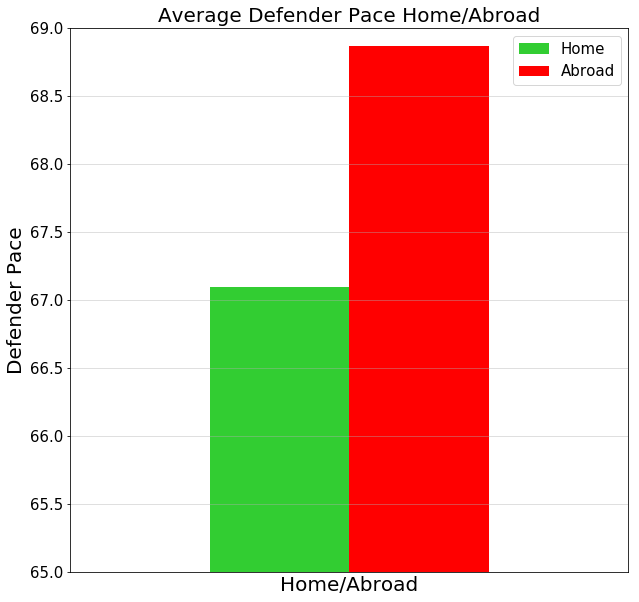

In [23]:
HomeDefPace = Home_DEF['pac'].mean()
AbroadDefPace = Abroad_DEF['pac'].mean()

AHPace = pd.DataFrame(columns = ["Home", "Abroad"])
AHPace.set_value(0,'Home',HomeDefPace)
AHPace.set_value(0,'Abroad',AbroadDefPace)

mpl.rcParams['font.size'] = 15
axis_size=20
color = ['limegreen','r']
fig = plt.figure(figsize=(10,10))
ax0 = plt.subplot()
ax0.set_ylim([65,69])
ax0.set_ylabel('Defender Pace',size=axis_size)
ax0.set_xlabel('Home/Abroad',size=axis_size)
ax0.set_title('Average Defender Pace Home/Abroad',size=20)
AHPace.plot(ax=ax0,kind='bar',color=color,grid=True)
ax0.grid(alpha=0.5)
plt.xticks([])

AHPace